# 第14届Python B组

### 试题 A: 2023（5分）
**问题描述**
> 请求出在 12345678 至 98765432 中，有多少个数中完全不包含 2023 。 完全不包含 2023 是指无论将这个数的哪些数位移除都不能得到 2023 。 例如 20322175，33220022 都完全不包含 2023，而 20230415，20193213 则 含有 2023 (后者取第 1, 2, 6, 8 个数位) 。

**答案提交:**
> 这是一道结果填空的题，你只需要算出结果后提交即可。本题的结果为一 个整数，在提交答案时只填写这个整数，填写多余的内容将无法得分。

**答案：**
> 85959030

In [ ]:
# BF
check = ['2','0','2','3']
def judge(num):
    global check    
    ans = False
    cur = 0
    s = str(num)
    for i in s:
        if i == check[cur]:
            cur += 1
            if cur == 4:
                ans = True
                break
    return ans
count = 0
for i in range(12345678, 98765433):
    if judge(i):
        count += 1
print(count)

### 试题 B: 硬币兑换（5分）
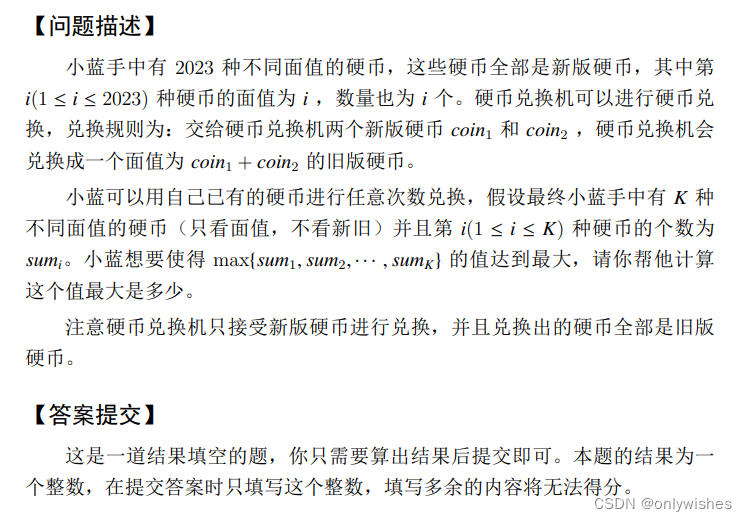

**题目答案：**
> 682425

In [ ]:
# 经过观察可知，最大个数在区间[1,2023]上单调递增，先算出2023的最大个数
ans = 2023
for i in range(1,1011):
    ans += i
print(ans) # 513589
# 对区间[2024,INF]
for end in range(1012,2023):
    # 后缀1代表奇数，后缀2代表偶数
    num1 = end*2 + 1
    num2 = end*2
    start1 = num1 - 2023
    start2 = num2 - 2023
    temp1 = (end+start1)*(end-start1+1)//2
    temp2 = (end-1+start2)*(end-start2)//2 + end//2
    ans = max(ans,temp1,temp2)
print(ans) # 682425

### 试题 C: 松散子序列（10分）
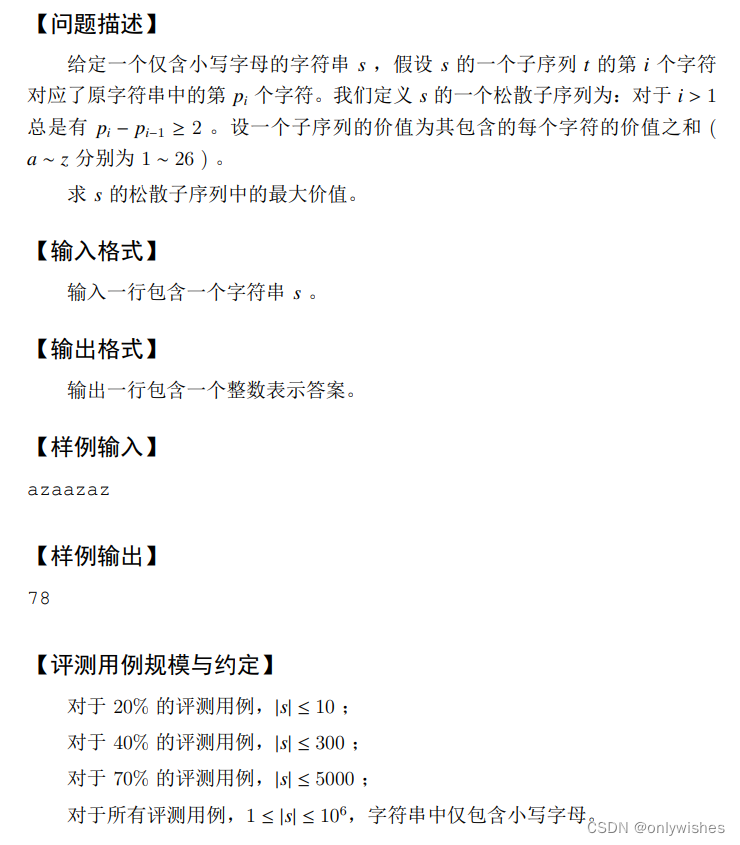

**题目答案：**
>
> 经典的打家劫舍问题，子序列中相邻的两个的字符在原串中相隔1或2个字符

In [ ]:
v = {'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8,'i':9,'j':10,'k':11,'l':12,'m':13,'n':14,'o':15,'p':16,'q':17,'r':18,'s':19,'t':20,'u':21,'v':22,'w':23,'x':24,'y':25,'z':26}
s = [v[i] for i in input()]
def f(s):
    n = len(s)
    if n == 0:
        return 0
    elif n == 1:
        return s[0]
    elif n == 2:
        return max(s[0],s[1])
    # n >= 3
    dp = [0]*n
    dp[0] = s[0]
    dp[1] = max(s[0],s[1])
    dp[2] = max(s[1],s[0]+s[2])
    for i in range(3,n):
        dp[i] = max(dp[i-2],dp[i-3])+s[i]
    return max(dp[n-2],dp[n-1])
print(f(s))


### 试题 D: 管道（10分）
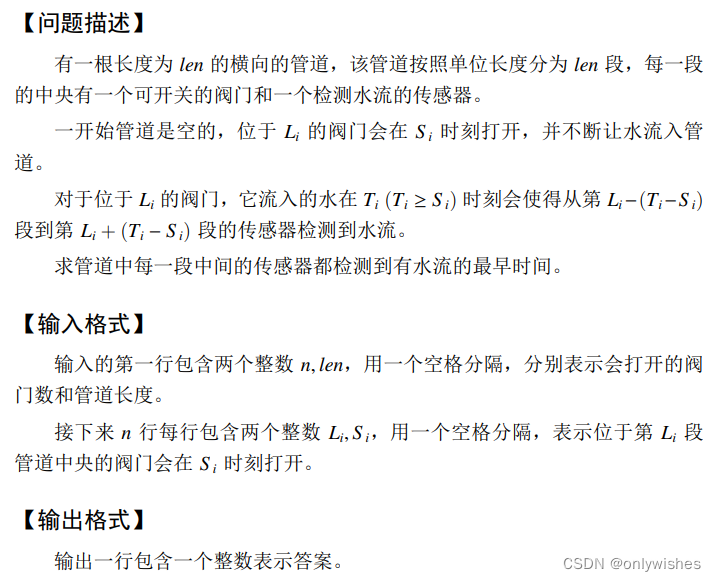

**题目答案：**
> 这是一个典型的区间覆盖问题。注意到数据规模很大，如果直接暴力求解用循环数作为时间t，则算法必然会超时，所以应当逐个尝试时间t，这样的好处是可以一次性获得各个区间，检查所有段是否均已检测到水的操作也只需要执行一次。
经过观察可知时间t具有二段性。具体来说，就是对于时间t，如果t大于最小时间，则该时刻水必然已经覆盖所有区间，如果t小于最小时间，则该时刻水必然没有覆盖所有区间。


In [ ]:
n,length = map(int,input().split())
s = [0]*n  # record the opening time 
l = [0]*n

for i in range(n):
    l[i],s[i] = map(int,input().split())
# judge the t is valid or not
def check(t):
    st = [] # record all of the interval
    for i in range(n):
        if s[i] > t:
            continue
        left = l[i] - (t - s[i]) 
        right = l[i] + (t - s[i])
        st.append((left,right))
    st.sort() # sort the list according to the first elements
    # notice the index is begin from 1
    if st == [] or st[0][0] > 1:
        return False
    r = 1 # the right board
    for i in st:
        if i[0] > r:
            break # the interval is not consist
        r = max(r,i[1])
    return r >= length
# use divide algorithm to find the smallest time
a = 1
b = 2_000_000_000
while a < b:
    mid = (a+b)//2
    if check(mid):
        # turn left
        b = mid # might be the right answer,so don't change the variable
    else:
        a = mid+1
print(a)

### 试题 E: 保险箱（15分）
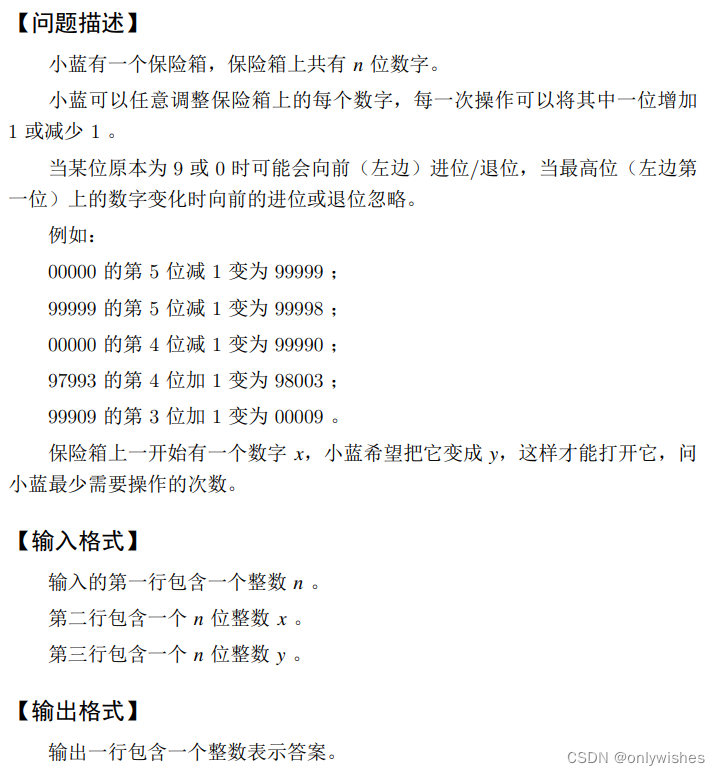

**题目答案：**
> 本题探讨数位的修改，是典型的数位dp，先用列表把整数各位拆分存储。然后从低位向高位搜索，因为高位修改一位就可能大幅减少低位的修改次数。

In [ ]:
n = int(input())
x = [int(i) for i in input()]
y = [int(i) for i in input()]

# 向上进位
def addI(i):
    if i <= 0:
        return 
    x[i-1] += 1
    while x[i-1] == 10:
        x[i-1] = 0
        i -= 1
        if i > 0:
            x[i-1] += 1
        else:
            break
    return
# 向上借位
def subI(i):
    if i <= 0:
        return
    x[i-1] -= 1
    while x[i-1] == -1:
        x[i-1] = 9
        i -= 1
        if i > 0:
            x[i-1] -= 1
        else:
            break
    return
def eval(a,b):
    # 估计a和b之间的最小距离
    if a == b:
        return 0,0
    elif a > b:
        # current number is larger than the target number
        if a - b > 5:
            return 1, b + 10 - a
        else:
            return 0, a - b
    else:
        # current number is smaller than the target number
        if b - a > 5:
            return -1,a + 10 - b
        else:
            return 0, b - a
    return 0,0
        
ans = 0
# adjust from the lower bit
for i in range(n-1,-1,-1):
    action, t = eval(x[i], y[i])
    if action == 1:
        addI(i)
    elif action == -1:
        subI(i)
    ans += t
print(ans)

In [ ]:
# 数位dp
n = int(input())
x = [0] + [int(i) for i in input()][::-1]
y = [0] + [int(i) for i in input()][::-1]

dp = [[0]*3 for i in range(n+1)]
# dp[i][0]:第i位通过直接加减变成目标状态所需要的步骤数
# dp[i][1]:第i位通过向上进位变成目标状态所需要的步骤数
# dp[i][2]:第i位通过向上借位变成目标状态所需要的步骤数
# 由于第一个数的计算不存在选择，所以特殊处理
dp[1][0] = abs(x[1] - y[1])
dp[1][1] = 10 + y[1] - x[1]
dp[1][2] = 10 + x[1] - y[1]
for i in range(2,n+1):
    dp[i][0] = min(dp[i-1][0] + abs(x[i]-y[i]), dp[i-1][1] + abs(x[i]+1-y[i]), dp[i-1][2] + abs(x[i]-1-y[i]))
    dp[i][1] = min(dp[i-1][0]+10+y[i]-x[i],dp[i-1][1]+10+y[i]-x[i]-1,dp[i-1][2]+10+y[i]-x[i]+1)
    dp[i][2] = min(dp[i-1][0]+10-y[i]+x[i],dp[i-1][1]+10-y[i]+x[i]+1,dp[i-1][2]+10-y[i]+x[i]-1)
print(min(dp[n][0], dp[n][1], dp[n][2]))

### 试题 F: 混乱的数组（25分）
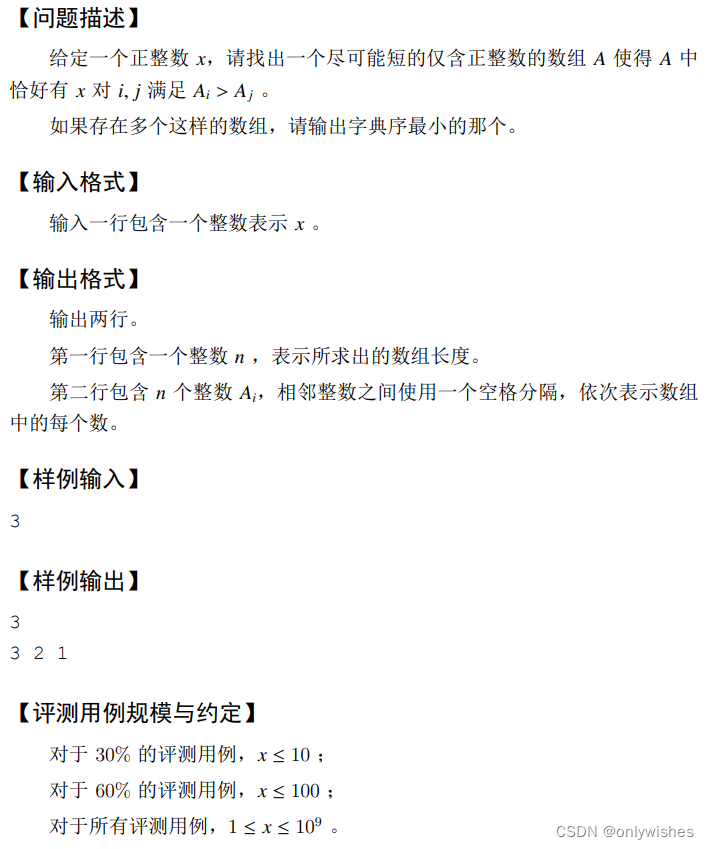

**题目答案：**
> 本题是一个思维拓展题，需要列出数据然后观察规律。\
> 由 $C_n^2$ 可以找出数列的长度n，题目中结果数组包括从1~a-1的逆序数列，从1~b的逆序数列和a三部分组成，可以先将前两个子数列合并然后逆序排序，然后再将a插入到数列首位即可

In [ ]:
# 由于测试规模很小，所以可以直接用if语句拿下30%的分数
n = int(input())
if n == 0:
    print(0)
    print()
elif n == 1:
    print(2)
    print(2,1)
elif n == 2:
    print(3)
    print(3,1,2)
elif n == 3:
    print(3)
    print(3,2,1)
elif n == 4:
    print(4)
    print(2,1,1,1)
elif n == 5:
    print(4)
    print(3,2,1,1)
elif n == 6:
    print(4)
    print(4,3,2,1)
elif n == 7:
    print(5)
    print(3,2,1,1,1)
elif n == 8:
    print(5)
    print(3,2,2,1,1)
elif n == 9:
    print(5)
    print(4,3,2,1,1)
elif n == 10:
    print(5)
    print(5,4,3,2,1)

In [ ]:
x = int(input())
def getBord(i):
    # 返回长度为i的列表中所能包含的最大逆序对数量
    return i*(i-1)//2
# 先用二分法确定列表的长度
left = 1
right = 100000
while left < right:
    mid = (left+right)//2
    temp = getBord(mid)
    if temp > x:
        right = mid
    elif temp < x:
        left = mid + 1
    else:
        # temp = x
        left = mid
        right = mid
        break
# n is the length of the list
n = left
print(n)
ans = []
a = x - getBord(n-1) + 1
b = n - a
for i in range(1,a):
    # 添加从1到a-1顺序序列
    ans.append(i)
for i in range(1,b+1):
    # 添加从1到b的顺序序列
    ans.append(i)
ans.sort(reverse = True)
for i in ans:
    print(i, end = ' ')